In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

## Dataset

In [2]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [3]:
n_data = 2000
t_steps = 20

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

print(labels[99])
print(data[99])

tensor([0.1813, 0.4629, 0.9410, 1.4430, 1.9212, 2.1951, 2.9150, 3.1013, 3.5252,
        3.9720, 4.1854, 4.4618, 4.6213, 4.7848, 4.9810, 5.3120, 5.6269, 5.8179,
        5.9257, 6.2832])
tensor([[0.0289],
        [0.0448],
        [0.0761],
        [0.0799],
        [0.0761],
        [0.0436],
        [0.1146],
        [0.0297],
        [0.0675],
        [0.0711],
        [0.0340],
        [0.0440],
        [0.0254],
        [0.0260],
        [0.0312],
        [0.0527],
        [0.0501],
        [0.0304],
        [0.0172],
        [0.0569]])


## Model training

100%|██████████| 1000/1000 [01:41<00:00,  9.86it/s]

Losses array was not a multiple of average. Truncated to 990


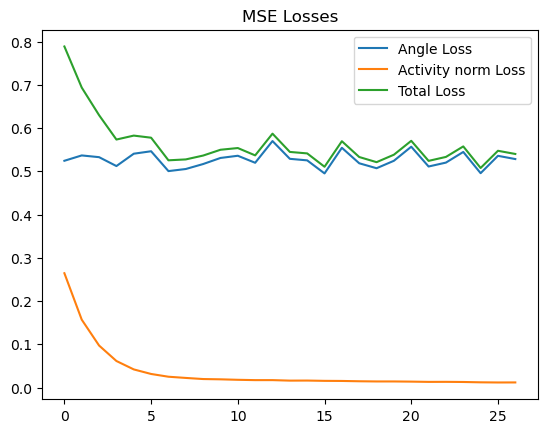

Guess on the first 15 training data:  tensor([[[0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960],
         [0.7099, 0.6960]],

        [[0.6921, 0.7142],
         [0.6935, 0.6973],
         [0.6928, 0.7066],
         [0.6917, 0.7189],
         [0.6910, 0.7268],
         [0.6905, 0.7330],
         [0.6945, 0.6864],
         [0.6948, 0.6821],
         [0.6919, 0.7170],
         [0.6929, 0.7045],
         [0.6939, 0.6936],
         [0.6921, 0.7147],
         [0.6942, 0.6895],
         [0.6925, 0.7099],
         [0.6912, 0.7248]],

        [[0.6722, 0.7564],
         [0.6728, 0.7518],
         [0.6744, 0.7316],
         [0.6728, 0.7489],
         [0.6740, 0.7327],
         [0.6

In [4]:
hidden_size = 2
input_size = 1
output_size = 1

train1 = True

if train1:
    # model2 = torch_RNN1(input_size,t_steps,output_size,hidden_size,lr=0.01,irnn=True,outputnn=False,Wx_normalize=True)
    # model1 = torch_RNN_full_manual(input_size,t_steps,output_size,hidden_size,lr=0.001,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # model1 = RNN_L2(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=1000,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    model1 = RNN_circular_ND(input_size,t_steps,output_size,hidden_size,lr=0.0001,w_decay=0.000,act_decay=0.01,irnn=True,outputnn=False,Wx_normalize=False,activation=False,rotation_init=False,bias=False)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))
    _ = model1.train(epochs=1000)
    model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

In [ ]:
_ = model1.train(epochs=1)

100%|██████████| 1/1 [00:00<00:00, 26.77it/s]


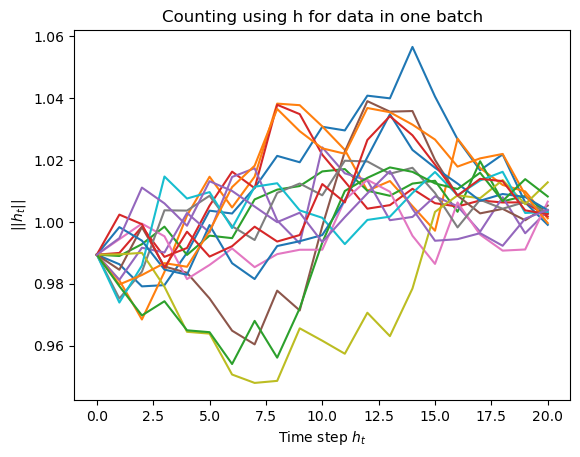

In [5]:
model1.hts.norm(dim=2).shape
htss = model1.hts.norm(dim=2)
plt.plot(htss.detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

torch.Size([21, 15, 2])


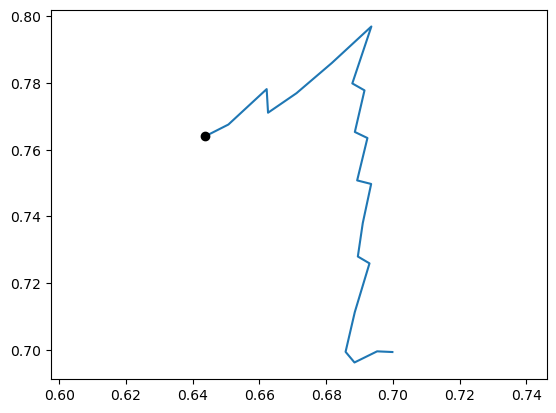

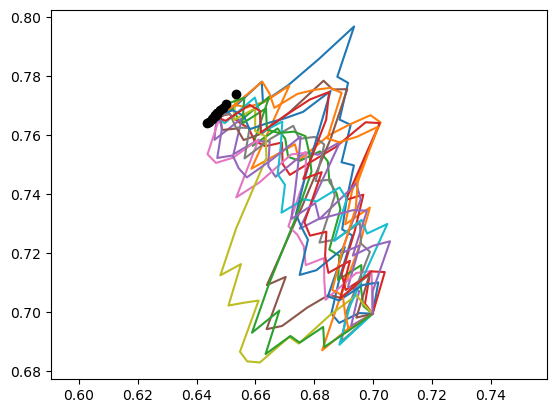

In [6]:
n = 0
print(model1.hts.shape)
model1.hts[:,n,:].shape
hts_cric = model1.hts.detach().numpy()
plt.plot(hts_cric[:,n,0],hts_cric[:,n,1],"-")
plt.plot(hts_cric[-1,n,0],hts_cric[-1,n,1],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,0],hts_cric[:,:,1],"-")
plt.plot(hts_cric[-1,:,0],hts_cric[-1,:,1],"o",color="black")
plt.axis("equal")
plt.show()

In [7]:
print(model1(data[10:11]))
print(data[10:11])
print(labels[10:11])

tensor([[[0.6998, 0.6994]],

        [[0.7018, 0.7100]],

        [[0.6964, 0.7091]],

        [[0.6884, 0.7039]],

        [[0.6846, 0.7053]],

        [[0.6904, 0.7220]],

        [[0.6807, 0.7142]],

        [[0.6750, 0.7125]],

        [[0.6779, 0.7245]],

        [[0.6757, 0.7287]],

        [[0.6738, 0.7331]],

        [[0.6768, 0.7456]],

        [[0.6812, 0.7603]],

        [[0.6855, 0.7750]],

        [[0.6762, 0.7679]],

        [[0.6700, 0.7657]],

        [[0.6641, 0.7641]],

        [[0.6580, 0.7620]],

        [[0.6561, 0.7666]],

        [[0.6524, 0.7684]],

        [[0.6470, 0.7674]]], grad_fn=<CopySlices>)
tensor([[[0.0708],
         [0.0373],
         [0.0243],
         [0.0435],
         [0.0884],
         [0.0169],
         [0.0346],
         [0.0745],
         [0.0518],
         [0.0529],
         [0.0765],
         [0.0835],
         [0.0840],
         [0.0204],
         [0.0344],
         [0.0357],
         [0.0343],
         [0.0535],
         [0.0457],
        

In [8]:
((torch.abs(torch.sin(torch.tensor(2*np.pi))-torch.sin(torch.tensor(0))) + torch.abs(torch.cos(torch.tensor(2*np.pi))-torch.cos(torch.tensor(0))))**2).mean()

tensor(3.0571e-14)

[0.31811246 0.67027324 0.76917726 1.0300148  1.3786526  1.5970808
 1.8589544  2.3157573  2.704067   2.9774332  3.1143346  3.5681915
 4.052018   4.7575283  5.3122883  5.6244664  5.660641   5.7827783
 5.964364   6.283187  ]


(-1.0996099710464478,
 1.099981427192688,
 -1.0989132165908813,
 1.0995863914489745)

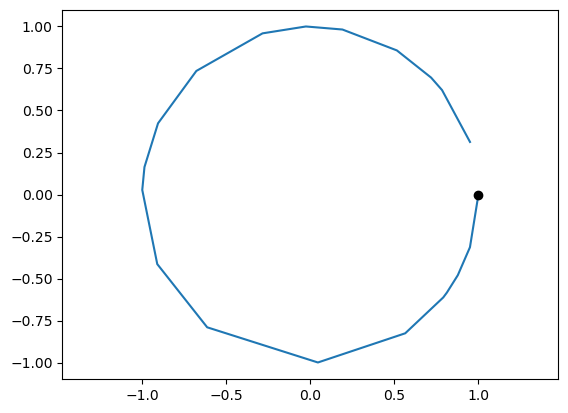

In [9]:
# Plot circle from data
data_raw = labels[91].detach().numpy()
print(data_raw)
data_points = np.zeros((t_steps,2))
for i in range(t_steps):
    data_points[i,0] = np.cos(data_raw[i])
    data_points[i,1] = np.sin(data_raw[i])


plt.plot(data_points[:,0],data_points[:,1],"-")
plt.plot(data_points[-1,0],data_points[-1,1],"o",color="black")
plt.axis("equal")

In [10]:
print(model1.input.weight)
print(model1.hidden.weight)
print(model1.Wh_init)
# print(model1.output.weight)

Parameter containing:
tensor([[0.2123],
        [0.3401]], requires_grad=True)
Parameter containing:
tensor([[ 0.9907, -0.0094],
        [-0.0096,  0.9904]], requires_grad=True)
tensor([[1., 0.],
        [0., 1.]])


In [11]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,0,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))

(21, 2)
0.3538778
0.18238424
0.11703392
0.21489134
0.43160072
0.09065408
0.17582935
0.358274
0.25333777
0.25717065
0.3527702
0.37220317
0.36476892
0.13122122
0.18238424
0.18767184
0.18345395
0.2517883
0.22555351
0.1978235


In [12]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [1.0000029 0.9810253]


0.981028

Norm av input: 1.0122391127886488
Norm av Wh-skalert input 0.9947334413092701 ratio: 0.982705991837095


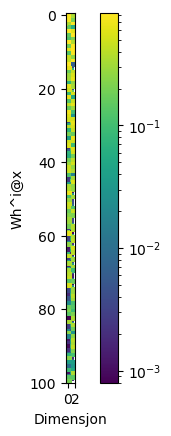

In [13]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

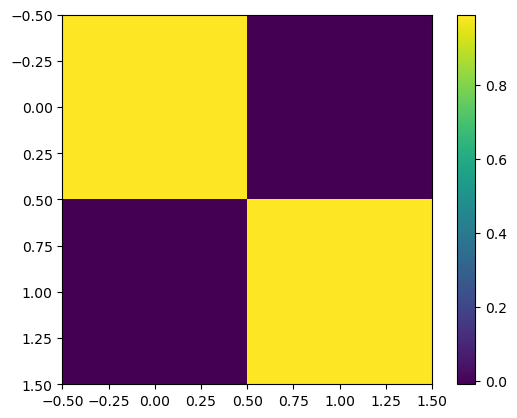

In [14]:
plt.imshow(Wh)
plt.colorbar()

In [15]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  0.40087306


In [16]:
import numpy as np
from sklearn.decomposition import PCA

# PCA of the weight matrix Wh
print(model1.hts.squeeze().T.detach().numpy())

pca = PCA(n_components=4)
pca.fit(model1.hts.T.squeeze().detach().numpy())
print("PCA variance ratio: ",pca.explained_variance_ratio_) # Variance explained by each component, the bigger the more a dimension is important
print("PCA singular values: ",pca.singular_values_)
# print("PCA components: ",pca.components_)
# print("PCA mean: ",pca.mean_)
print("PCA noise: ", pca.noise_variance_)

[[0.69983244 0.701755   0.6964468  0.6884459  0.684634   0.6903907
  0.68074936 0.6750412  0.677851   0.6757085  0.6737747  0.67682797
  0.68122417 0.68554175 0.67619777 0.6699661  0.6641011  0.65800315
  0.6560601  0.6524251  0.64701927]
 [0.6993747  0.71000016 0.70910853 0.7038696  0.7052706  0.72198945
  0.7141593  0.7125367  0.724522   0.72865266 0.7331288  0.7456088
  0.76032454 0.7750175  0.7679251  0.7657305  0.76407814 0.76201224
  0.7665593  0.7684097  0.7674134 ]]


C:\Users\matti\AppData\Local\Temp\ipykernel_8800\3037727185.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3582.)
  pca.fit(model1.hts.T.squeeze().detach().numpy())


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'